In [3]:
pip install --upgrade pip


     |████████████████████████████████| 2.1 MB 2.9 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install git+https://github.com/fivethirtyeight/matplotlib-stylesheets.git


  Cloning https://github.com/fivethirtyeight/matplotlib-stylesheets.git to /tmp/pip-req-build-0vdoolvg
  Running command git clone --filter=blob:none --quiet https://github.com/fivethirtyeight/matplotlib-stylesheets.git /tmp/pip-req-build-0vdoolvg
Username for 'https://github.com': ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
print('done')

done


In [5]:
datatype = {"key":"object","fare_amount":"float64","pickup_datetime":"object","pickup_longitude":"float64","pickup_latitude":"float64",
            "dropoff_longitude":"float64","dropoff_latitude":"float64","passenger_count":"int64"}
df_raw = pd.read_csv("train.csv",low_memory=False,nrows=10**5,dtype=datatype,parse_dates=["pickup_datetime"])

In [6]:
df_raw.drop(['key'],axis=1,inplace=True)

In [7]:
df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
print(df_raw.shape)

(100000, 7)


In [9]:
import calendar

df_raw['pickup_date'] = df_raw['pickup_datetime'].dt.date
df_raw['pickup_day'] = df_raw['pickup_datetime'].apply(lambda x:x.day)
df_raw['pickup_hour'] = df_raw['pickup_datetime'].apply(lambda x:x.hour)
df_raw['pickup_day_of_week'] = df_raw['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df_raw['pickup_month'] = df_raw['pickup_datetime'].apply(lambda x:x.month)
df_raw['pickup_year']= df_raw['pickup_datetime'].apply(lambda x:x.year)

df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [ ]:
# Remove 0 passenger count
# The taxi fare initial charge is 2.5$, so we remove small than this

In [10]:
# Revolving outlier value
df_raw = df_raw[((df_raw['pickup_longitude'] > -78) &
                 (df_raw['pickup_longitude']<-70)) &
                 ((df_raw['dropoff_longitude'] >-78) & 
                  (df_raw['dropoff_longitude']< -70)) &
                  ((df_raw['pickup_latitude'] > 37) &
                  (df_raw['pickup_latitude'] < 45)) &
                  ((df_raw['dropoff_latitude'] >37) &
                  (df_raw['dropoff_latitude']<45)) &
                  (df_raw['passenger_count']> 0) &
                  (df_raw['fare_amount'] > 2.5)]

In [11]:
# To analyse change in the data
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,97196.000000,97196.000000,97196.000000,97196.000000,97196.000000,97196.000000,97196.000000,97196.000000,97196.000000,97196.000000
mean,11.386393,-73.975223,40.751044,-73.974091,40.751483,1.681468,15.662270,13.495586,6.263200,2011.744815
std,9.701063,0.043475,0.036063,0.039676,0.037100,1.299243,8.676681,6.504717,3.451889,1.870870
min,2.510000,-75.425388,38.754215,-75.354559,39.296307,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992268,40.736663,-73.991393,40.735780,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982082,40.753542,-73.980440,40.753976,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968325,40.767692,-73.965180,40.768485,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.183332,-72.854940,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [12]:
# check for null values
df_raw.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

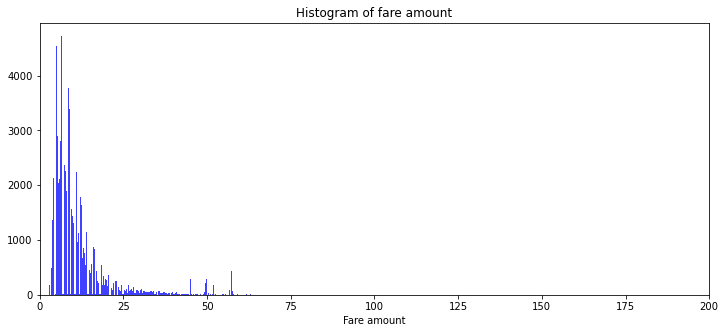

In [13]:
# Visualising Target variable
plt.figure(figsize=(12,5))
n,bins,patches = plt.hist(df_raw.fare_amount,1000,alpha=0.75,facecolor='blue')
plt.xlabel('Fare amount')
plt.title('Histogram of fare amount')
plt.xlim(0,200)
plt.show()

Text(0.5, 1.0, 'Distribution of Fare amount in Log scale')

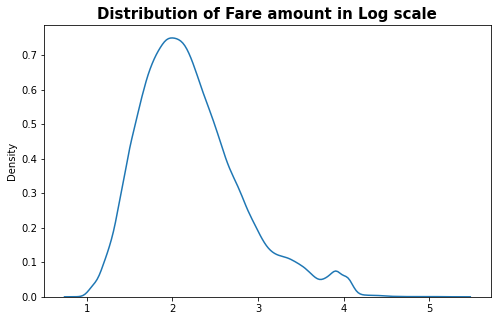

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_raw['fare_amount'].values)).set_title("Distribution of Fare amount in Log scale",fontsize=15,fontweight='bold')

In [15]:
# Analysing Top 5 fare amount
df_raw['fare_amount'].value_counts(normalize=True).iloc[:5]

6.5    0.048253
4.5    0.041782
8.5    0.038469
5.3    0.029374
5.7    0.028900
Name: fare_amount, dtype: float64

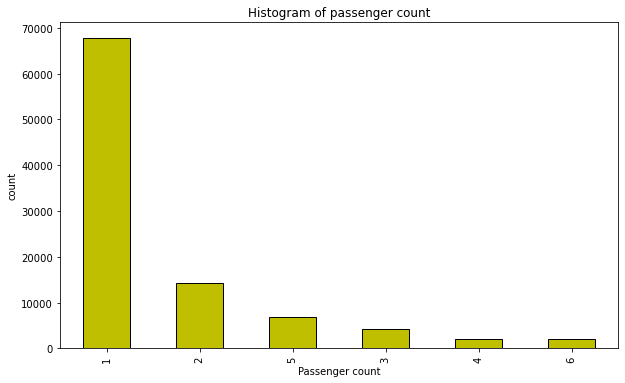

In [16]:
# Passenger count
plt.figure(figsize=(10,6))
df_raw['passenger_count'].value_counts().plot.bar(color='y',edgecolor='k')
plt.xlabel('Passenger count')
plt.title('Histogram of passenger count')
plt.ylabel('count')
plt.show()

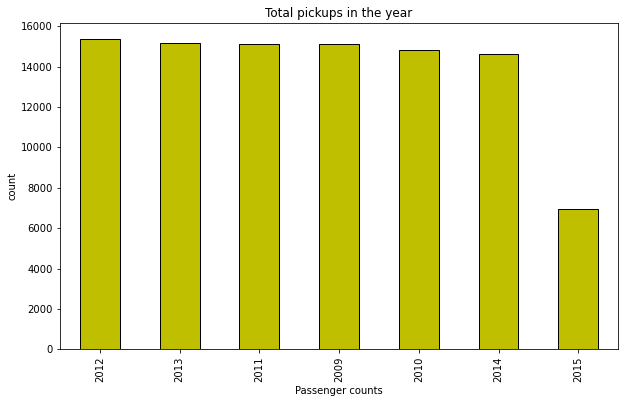

In [17]:
plt.figure(figsize=(10,6))
df_raw['pickup_year'].value_counts().plot.bar(color='y',edgecolor='k')
plt.xlabel('Passenger counts')
plt.title('Total pickups in the year')
plt.ylabel('count')
plt.show()

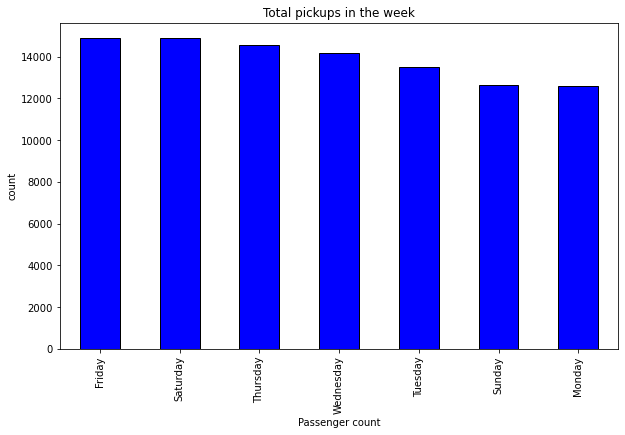

In [18]:
# Passenger count
plt.figure(figsize=(10,6))
df_raw['pickup_day_of_week'].value_counts().plot.bar(color='b',edgecolor='k')
plt.xlabel('Passenger count')
plt.title('Total pickups in the week')
plt.ylabel('count')
plt.show()

In [19]:
# Anaysing number of passengers
df_raw['passenger_count'].value_counts()

1    67824
2    14266
5     6854
3     4208
4     2041
6     2003
Name: passenger_count, dtype: int64

(40.63, 40.85)

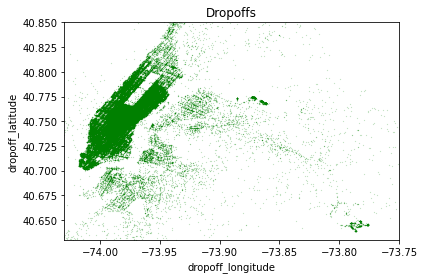

In [20]:
#plot heatmap of pickups and dropoffs within newyork
city_long_border = (-74.03,-73.75)
city_lat_border = (40.63,40.85)

df_raw.plot(kind='scatter',x = 'dropoff_longitude',y='dropoff_latitude',
            color='green',
            s=.02,alpha=.6)
plt.title('Dropoffs')
plt.xlim(city_long_border)
plt.ylim(city_lat_border)

(40.63, 40.85)

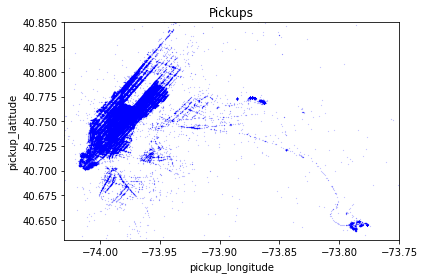

In [21]:
df_raw.plot(kind='scatter',x = 'pickup_longitude',y='pickup_latitude',
            color='blue',
            s=.02,alpha=.6)
plt.title('Pickups')
plt.xlim(city_long_border)
plt.ylim(city_lat_border)

In [22]:
def distance(lat1,lon1,lat2,lon2):
    p = 0.017453292519943295 #pi/180
    a = 0.5 - np.cos((lat2 - lat1)*p)/np.cos(lat1 *p) * np.cos(lat2 * p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

# add new column to dataframe with distance in miles
df_raw['distance_miles'] = distance(df_raw.pickup_latitude,df_raw.pickup_longitude,df_raw.dropoff_latitude,df_raw.dropoff_longitude)
df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,6218.399246
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,6218.398435
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,6218.399207
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,6218.399238
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,6218.399171


In [23]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [24]:
import folium
pickup_Locations = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',zoom_start=12)

for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'],each[1]['pickup_longitude']],
                        radius = 3,
                        color = 'blue',
                        popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                        fill_color='#FD8A6C').add_to(pickup_Locations)
    
pickup_Locations

In [25]:
dropoff_Locations = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',zoom_start=12)

for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'],each[1]['dropoff_longitude']],
                        radius = 3,
                        color = 'orange',
                        popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                        fill_color='#FD8A6C').add_to(dropoff_Locations)
    
dropoff_Locations

In [26]:
df_final = df_raw.copy()
df_final.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,6218.399246
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,6218.398435
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,6218.399207
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,6218.399238
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,6218.399171


In [27]:
#Imputing the categorical data
Variables = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
year = {2012:1,2013:2,2011:3,2009:4,2010:5,2014:6,2015:7}
df_final['pickup_year'] = df_final['pickup_year'].map(year)
df_final['pickup_day_of_week'] = df_final['pickup_day_of_week'].map(Variables)
df_final.drop(['pickup_datetime','pickup_date'],axis=1,inplace=True)
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,6218.399246
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,6218.398435
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,6218.399207
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,1,6218.399238
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,6218.399171


In [28]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['fare_amount'],axis=1)
y = df_final[['fare_amount']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(68037, 11)
(29159, 11)
(68037, 1)
(29159, 1)


In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Test RMSE:%.3f" %mean_squared_error(y_test,y_pred)**0.5)

Test RMSE:13.286


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5,random_state=0,n_estimators=200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Test RMSE:%3f" % mean_squared_error(y_test,y_pred)**0.5)

Test RMSE:5.488644


In [33]:
# To save the trained model as a pickle string
import pickle
pickle.dump(rf,open('rf','wb'))

In [34]:
import folium
Enter_Coordinates = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',zoom_start=12)

popup = folium.LatLngPopup()
popup = folium.ClickForMarker()

Enter_Coordinates.add_child(popup)
Enter_Coordinates

In [35]:
Pickup_Finder = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',zoom_start=12)
Pickup = [40.744075,-74.003197]
Drop_off = [40.7616,-73.9734]

points = []
for i in range(len(Pickup)):
    points.append([Pickup[i],Drop_off[i]])

print("Distance between Pickup and dropoff in miles :",distance(Pickup[0],Pickup[1],Drop_off[0],Drop_off[1]))

folium.CircleMarker(Pickup,radius=5,color='blue',popup=str([Pickup[0],Pickup[1]]),fill_color='#FD8A6C').add_to(Pickup_Finder)

folium.CircleMarker(Drop_off,radius=5,color='red',popup=str([Drop_off[0],Drop_off[1]]),fill_color='#FD8A6C').add_to(Pickup_Finder)

for index,lat in enumerate(Pickup):
    folium.Marker([lat,Drop_off[index]],
                  icon = folium.Icon(color='green',icon='plus')).add_to(Pickup_Finder)

folium.PolyLine([Pickup,Drop_off],color= 'green',weight=3,opacity=5).add_to(Pickup_Finder)

Pickup_Finder


Distance between Pickup and dropoff in miles : 6218.398715076268


In [36]:
print('Enter your information to predict fare:')
Pickup_Coordinates = str(input('Enter pickup coordinates:'))
Drop_off_Coordinates = str(input('Enter Drop_off coordinates'))

pickup_latitude = float(Pickup_Coordinates.split(',')[0])
pickup_longitude = float(Pickup_Coordinates.split(',')[1])

dropoff_latitude = float(Drop_off_Coordinates.split(',')[0])
dropoff_longitude = float(Drop_off_Coordinates.split(',')[1])

Enter_Date = input("Enter Date (DD/MM/YEAR)")

passenger_count = int(input('Enter Number of Passengers:'))

pickup_day = int(Enter_Date.split('/')[0])
pickup_hour =int(input('Enter hour:'))

pickup_day_of_week = int(input('Enter week:'))

pickup_month = int(Enter_Date.split('/')[1])
pickup_year = int(Enter_Date.split('/')[2])

distance_miles = distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude)
my_array = np.array([pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,
                     pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles])

print('fare amount ($):',rf.predict(my_array.reshape(1,-1)))


Enter your information to predict fare:
fare amount ($): [26.51487522]


In [38]:
import tkinter as tk
from tkinter import ttk
import tkinter.filedialog
from tkinter.scrolledtext import *
from tkinter import *

window = tk.Tk()
window.title("Newyork Taxi prediction by Karnati")
window.geometry('400x350')

#column1
l1 = Label(window,text='Pickup_coordinates',padx=5,pady=5)
l1.grid(row=3,column=2)
pickup_value = StringVar()
entry = Entry(window,textvariable=pickup_value)
entry.grid(row=3,column=3)

l2 = Label(window,text='Dropoff_coordinates',padx=5,pady=5)
l2.grid(row=3,column=2)
drop_off_value = StringVar()
entry2 = Entry(window,textvariable=drop_off_value)
entry2.grid(row=4,column=3)

l3 = Label(window,text = 'Enter Date',padx=5,pady=5)
l3.grid(row=5,column=2)
date_value = StringVar()
entry3 = Entry(window,textvariable=date_value)
entry3.grid(row=5,column=3)


l4 = Label(window,text = 'No.of Passengers',padx=5,pady=5)
l4.grid(row=6,column=2)
passenger_value = StringVar()
entry4 = Entry(window,textvariable=passenger_value)
entry4.grid(row=6,column=3)


l5 = Label(window,text = 'Enter Hour',padx=5,pady=5)
l5.grid(row=7,column=2)
hour_value = StringVar()
entry5 = Entry(window,textvariable=hour_value)
entry5.grid(row=7,column=3)


l6 = Label(window,text = 'Enter Week',padx=5,pady=5)
l6.grid(row=8,column=2)
week_value = StringVar()
entry6 = Entry(window,textvariable=week_value)
entry6.grid(row=8,column=3)

import pandas as pd
data = pd.DataFrame()

def action():
    global db 
    import pandas as pd
    data = pd.DataFrame(columns=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','passenger_count','pickup_day','pickup_hour','pickup_day_of_week','pickup_month','pickup_year',
                                 'distance_miles'])
    p = pickup_value.get()
    p = p.split(',')[0]
    p =float(p)
    data.loc[0,'pickup_latitude']=p

    p1 = pickup_value.get()
    p1 = p1.split(',')[1]
    p1 = float(p1)
    data.loc[0,'pickup_longitude']=p1

    l = drop_off_value.get()
    l = l.split(',')[0]
    l = float(l)
    data.loc[0,'dropoff_latitude']


    l1 = drop_off_value.get()
    l1 = l1.split(',')[1]
    l1 = float(l1)
    data.loc[0,'dropoff_longitude']

    pa = passenger_value.get()
    data.loc[0,'passenger_count']=pa

    d=date_value.get()
    d = d.split('/')[0]
    data.loc[0,'pickup_day']=d

    h=hour_value.get()
    data.loc[0,'pickup_hour']=h

    w = week_value.get()
    data.loc[0,'pickup_day_of_week']=w

    m= date_value.get()
    m = m.split('/')[1]
    data.loc[0,'pickup_month']=m

    y = date_value.get()
    y = y.split('/')[2]
    data.loc[0,'pickup_year'] = y
    

    import numpy as np
    def distance(lat1,lon1,lat2,lon2):
        p = 0.017453292519943295 
        a = 0.5 - np.cos((lat2 - lat1)*p)/2 + np.cos(lat1 *p) * np.cos(lat2 * p) * (1-np.cos((lon2-lon1)*p))/2
        return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
    
    dis = distance(p,p1,l,l1)
    data.loc[0,'distance_miles'] = dis
    